In [9]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("SVM_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [5]:
df = pd.read_csv('data/features_full_v7.csv')

In [8]:
print(df['label'].value_counts())

label
sad          50
pumpup       50
relaxing     48
fearful      42
Name: count, dtype: int64


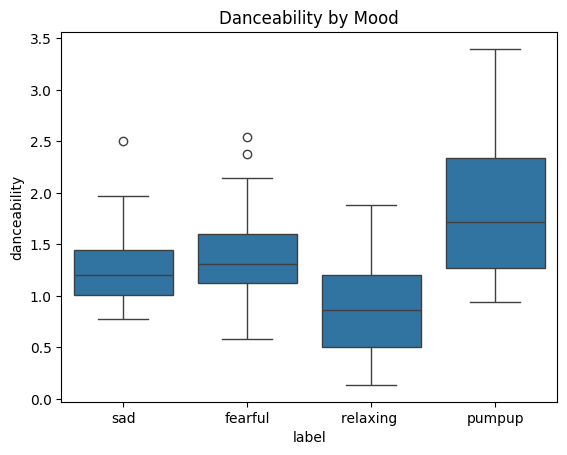

In [10]:
# Example: Danceability by label
sns.boxplot(x='label', y='danceability', data=df)
plt.title('Danceability by Mood')
plt.show()

In [13]:
grouped = df.groupby('label').mean(numeric_only=True)
print(grouped)

           danceability    energy       key  speechiness  acousticness  \
label                                                                    
fearful        1.352710  0.219018  6.000000     1.792700      0.984057   
pumpup         1.849864  0.295805  4.780000     2.270372      0.969977   
relaxing       0.859104  0.118167  5.666667     1.094414      0.995274   
sad            1.257585  0.185232  5.440000     1.588362      0.988954   

           instrumentalness  liveness  valence  time_signature  
label                                                           
fearful            0.157129  0.015943      1.0      114.252879  
pumpup             0.066115  0.030023      1.0      121.053004  
relaxing           0.239180  0.004726      1.0      116.962292  
sad                0.049240  0.011046      1.0      123.846326  


/var/folders/0c/dtv0rycx07s1bhs9yj_fb0lc0000gn/T/ipykernel_17594/3384227851.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='label', y=feature, ax=axes[i], palette=palette)
/var/folders/0c/dtv0rycx07s1bhs9yj_fb0lc0000gn/T/ipykernel_17594/3384227851.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='label', y=feature, ax=axes[i], palette=palette)
/var/folders/0c/dtv0rycx07s1bhs9yj_fb0lc0000gn/T/ipykernel_17594/3384227851.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='label', y=fea

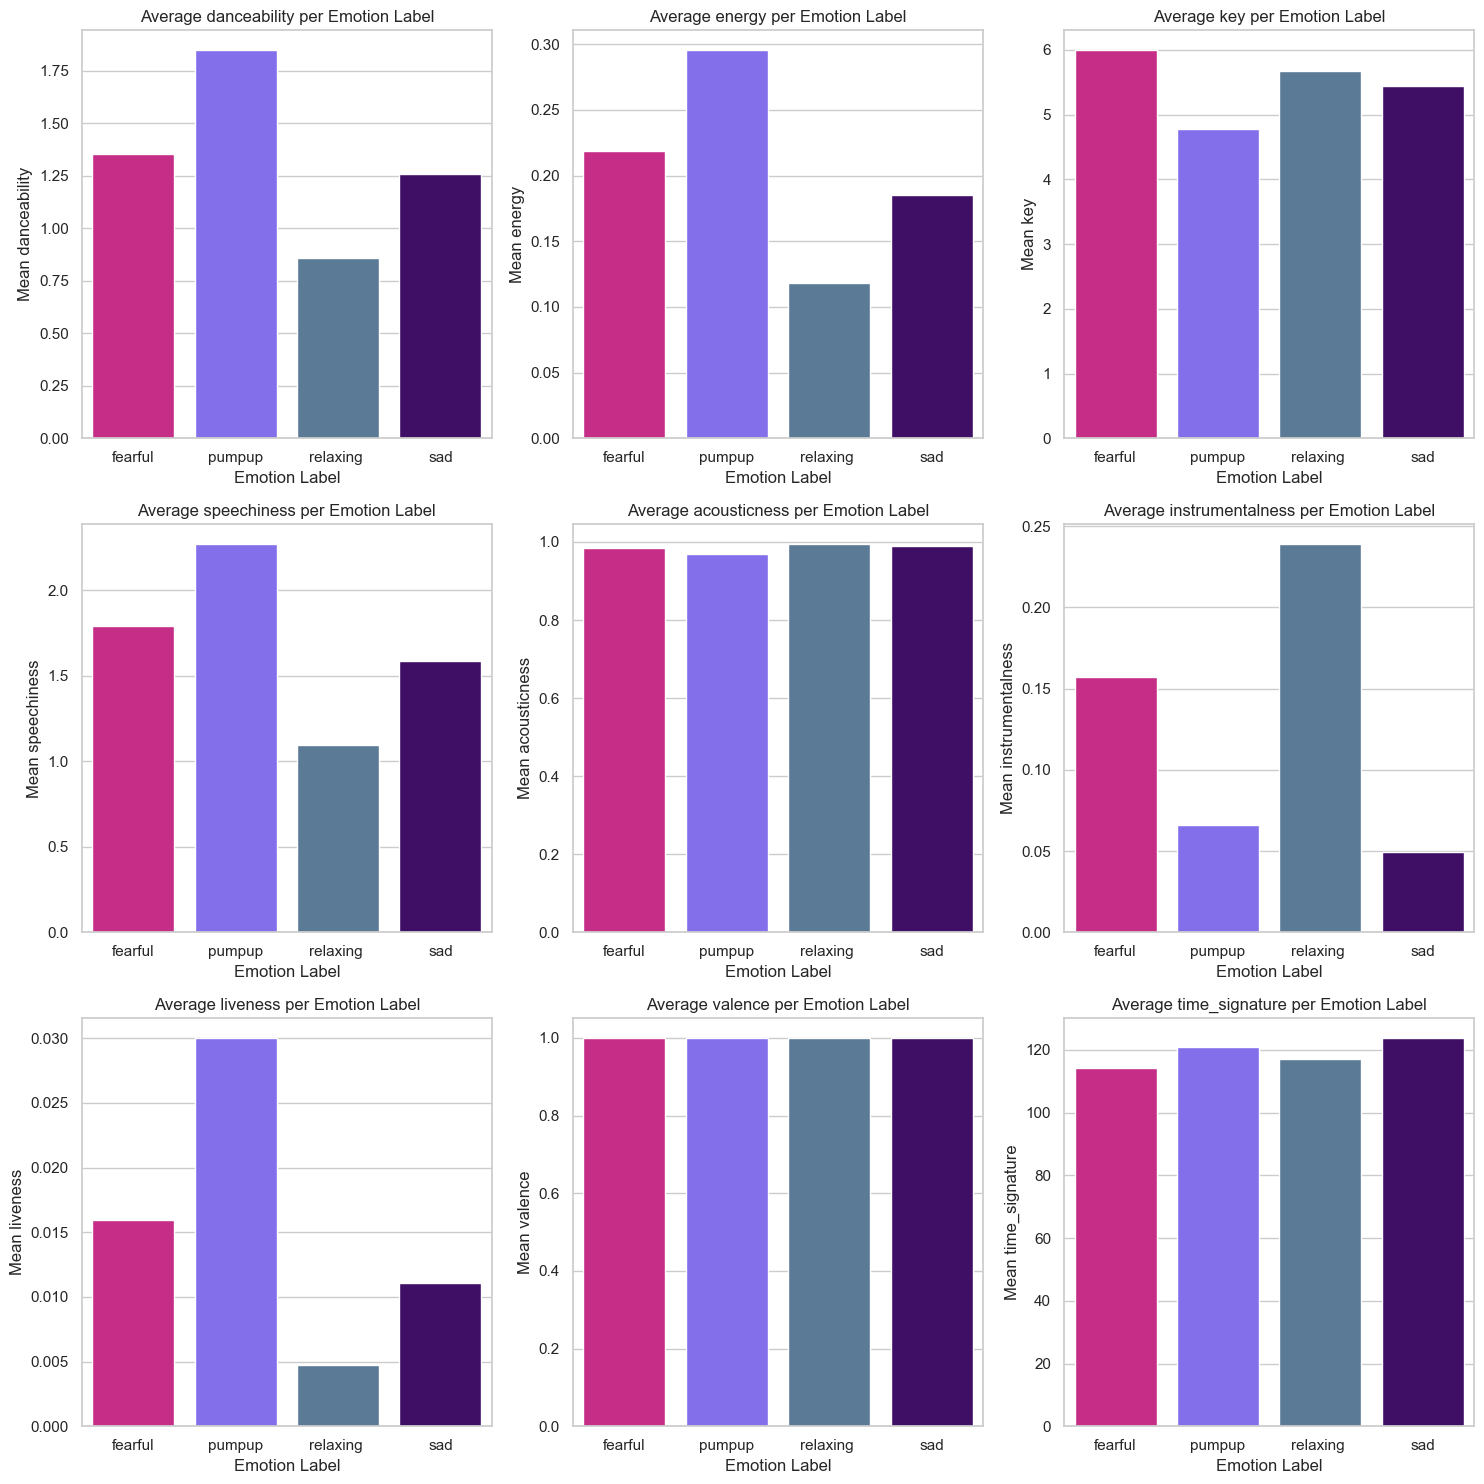

In [43]:
# Read your data (replace with your actual path if needed)
df = pd.read_csv("data/features_full_v7.csv")

# Group by label and compute the mean for numeric columns only
grouped = df.groupby('label').mean(numeric_only=True).reset_index()

# Define custom colors for each label
label_colors = {
    'fearful': 'magenta',
    'happy': 'yellow',
    'sad': 'blue',
    'relaxing': 'green',
    'pumpup': 'orange'
}

palette = ['#df138c', '#755afe','#517aa0','#400074']

# Set the visual style
sns.set(style="whitegrid")

# Create a subplot grid (adjust rows and columns as necessary)
features = grouped.columns[1:]  # Exclude the 'label' column
num_features = len(features)
cols = 3  # Number of columns for the grid
rows = (num_features // cols) + (num_features % cols > 0)  # Number of rows needed to fit all plots

# Create a single figure to hold all subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Create a bar plot for each feature
for i, feature in enumerate(features):
    sns.barplot(data=grouped, x='label', y=feature, ax=axes[i], palette=palette)
    axes[i].set_title(f'Average {feature} per Emotion Label')
    axes[i].set_xlabel('Emotion Label')
    axes[i].set_ylabel(f'Mean {feature}')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG image
plt.savefig('emotion_label_plots.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/0c/dtv0rycx07s1bhs9yj_fb0lc0000gn/T/ipykernel_17594/2514857613.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='label', y=feature, ax=axes[i], palette=palette)
/var/folders/0c/dtv0rycx07s1bhs9yj_fb0lc0000gn/T/ipykernel_17594/2514857613.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='label', y=feature, ax=axes[i], palette=palette)
/var/folders/0c/dtv0rycx07s1bhs9yj_fb0lc0000gn/T/ipykernel_17594/2514857613.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='label', y=fea

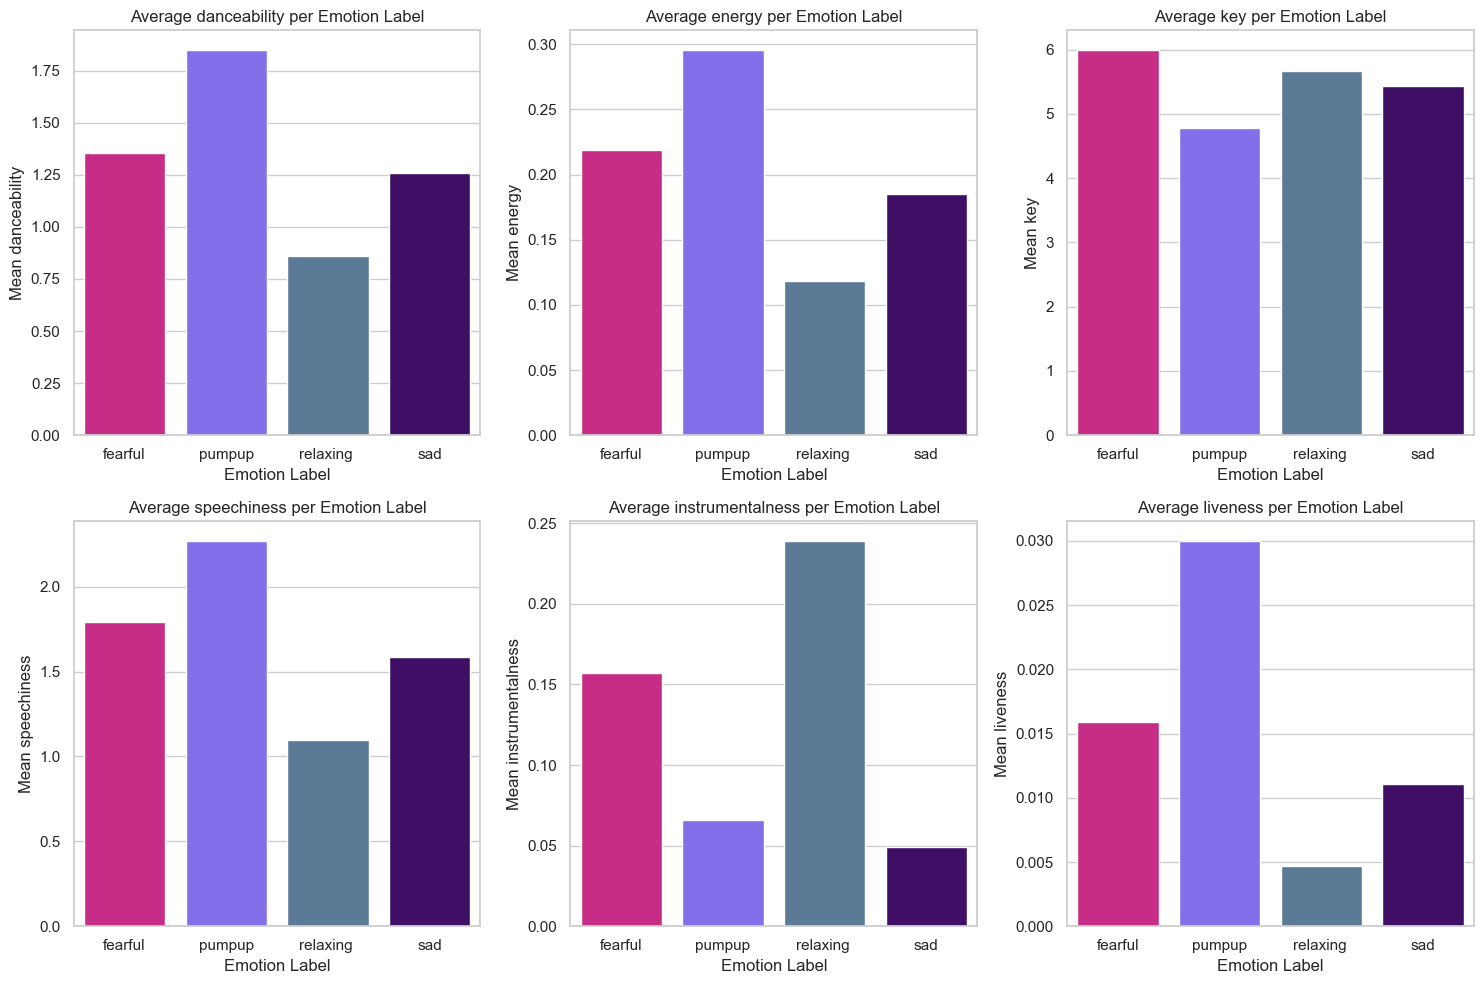

In [45]:
# Read your data (replace with your actual path if needed)
df = pd.read_csv("data/features_full_v7.csv")

# Group by label and compute the mean for numeric columns only
grouped = df.groupby('label').mean(numeric_only=True).reset_index()

# Define custom colors for each label
# label_colors = {
#     'fearful': 'magenta',
#     'happy': 'yellow',
#     'sad': 'blue',
#     'relaxing': 'green',
#     'pumpup': 'orange'
# }

palette = ['#df138c', '#755afe','#517aa0','#400074']

# Set the visual style
sns.set(style="whitegrid")

# List of features to exclude from plotting
exclude_features = ['acousticness', 'valence', 'time_signature']

# Filter out the excluded features
features = [feature for feature in grouped.columns[1:] if feature not in exclude_features]

# Create a subplot grid (adjust rows and columns as necessary)
num_features = len(features)
cols = 3  # Number of columns for the grid
rows = (num_features // cols) + (num_features % cols > 0)  # Number of rows needed to fit all plots

# Create a single figure to hold all subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Create a bar plot for each feature
for i, feature in enumerate(features):
    sns.barplot(data=grouped, x='label', y=feature, ax=axes[i], palette=palette)
    axes[i].set_title(f'Average {feature} per Emotion Label')
    axes[i].set_xlabel('Emotion Label')
    axes[i].set_ylabel(f'Mean {feature}')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG image
plt.savefig('emotion_label_plots_filtered.png', dpi=300, bbox_inches='tight')

plt.show()


<Figure size 640x480 with 0 Axes>